In [1]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

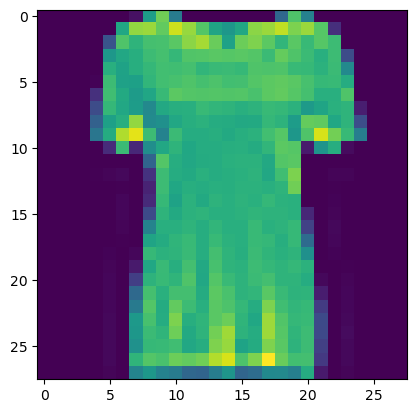

In [5]:
plt.imshow(x_train[10])

In [6]:
len(np.unique(y_train))

10

In [7]:
for i in range(len(np.unique(y_train))):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [8]:
# Define the class labels based on the dataset documentation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
def plot_class_distribution(labels):
    # Count the occurrences of each label
    unique, counts = np.unique(labels, return_counts=True)
    
    # Create a bar plot
    plt.bar(class_names, counts, color='blue')
    plt.xlabel('Fashion Item')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Fashion Items in the Dataset')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


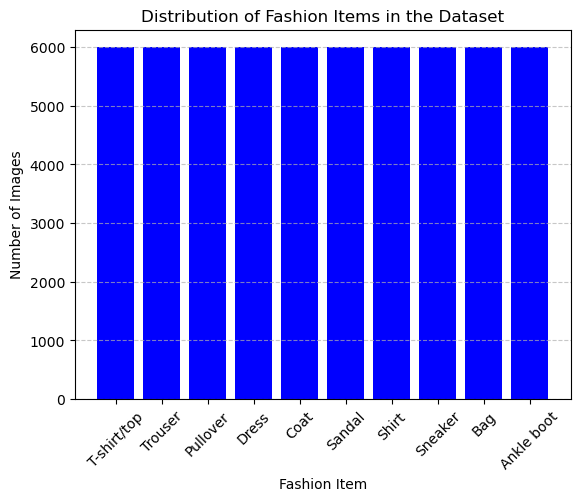

In [10]:
plot_class_distribution(y_train)

In [11]:
#Normalization od dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
# Reshape the input data to 1D (flatten each image of size 28x28)
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

In [13]:
num_labels = len(np.unique(y_train))
num_labels

10

In [14]:
#one hot coding for labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape[0]

60000

In [34]:
hidden_units = 256
num_labels = num_labels
dropout = 0.4

In [35]:
# Define the model architecture
model = Sequential()
model.add(Dense(hidden_units, input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,002 (1.54 MB)

 Trainable params: 402,954 (1.54 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [37]:
from tensorflow.keras.optimizers import SGD
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(learning_rate=0.001),
    metrics = ['accuracy']
)

In [40]:
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 128
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7271 - loss: 0.7901 - val_accuracy: 0.8048 - val_loss: 0.5272
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7319 - loss: 0.7757 - val_accuracy: 0.8084 - val_loss: 0.5175
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7409 - loss: 0.7577 - val_accuracy: 0.8117 - val_loss: 0.5111
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7479 - loss: 0.7276 - val_accuracy: 0.8162 - val_loss: 0.5038
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7479 - loss: 0.7229 - val_accuracy: 0.8170 - val_loss: 0.4990
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7497 - loss: 0.7205 - val_accuracy: 0.8196 - val_loss: 0.4931
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7611 - loss: 0.6950 - val_accuracy: 0.8221 - val_loss: 0.4858
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7655 - loss: 0.6796 - val_accu

In [41]:
loss, acc = model.evaluate(x_test, y_test,verbose = 2)
print(f'Test accuracy: {acc}, Test loss: {loss}')

313/313 - 1s - 3ms/step - accuracy: 0.8353 - loss: 0.4648
Test accuracy: 0.8353000283241272, Test loss: 0.4647844135761261


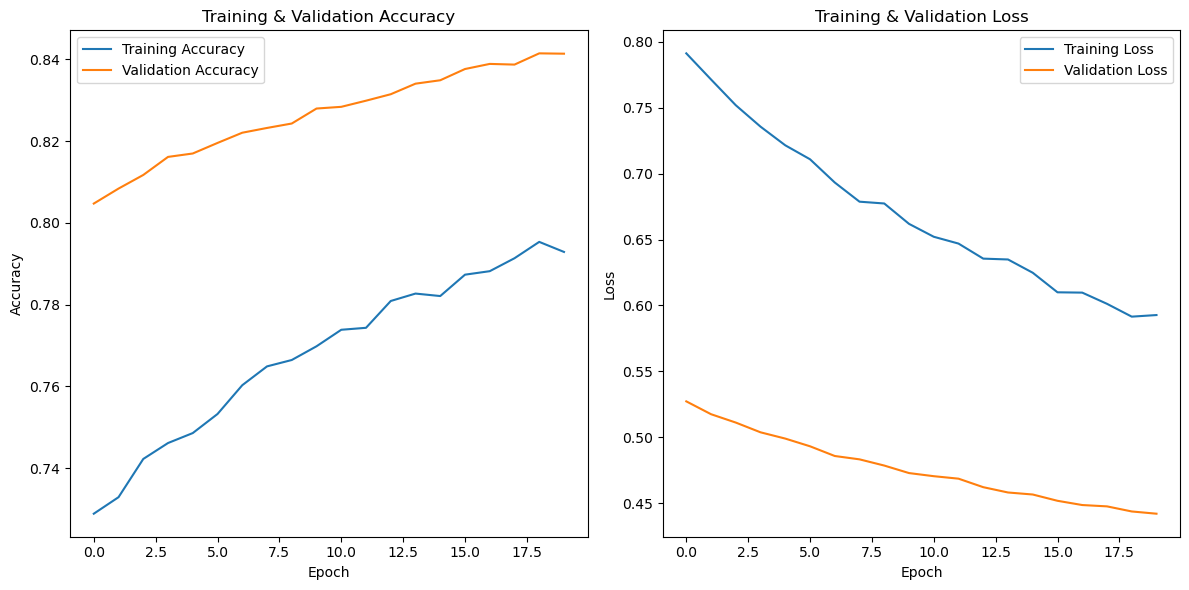

In [42]:
# Visualization
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

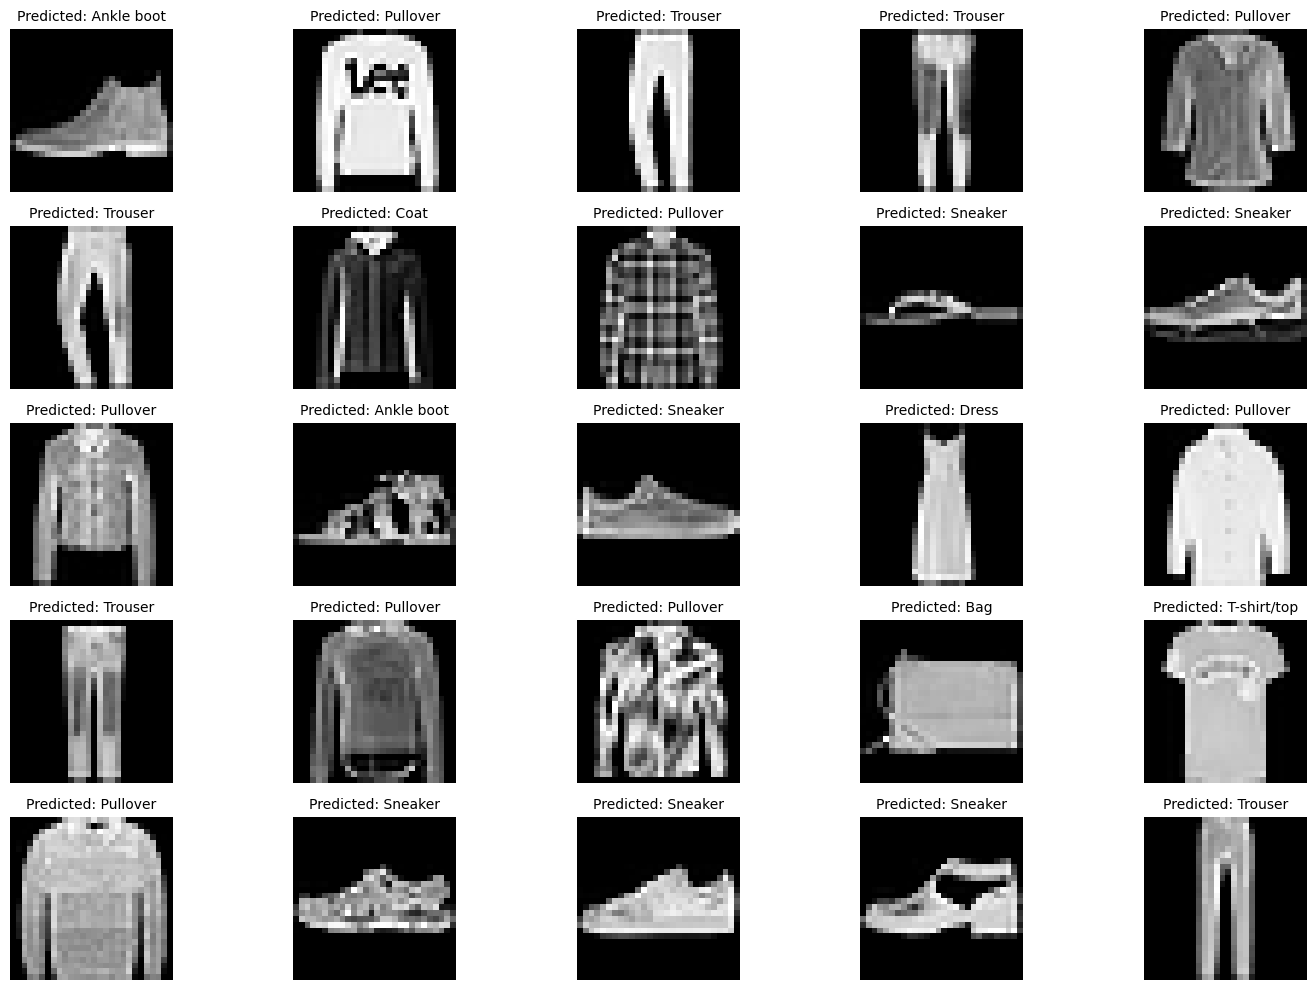

In [43]:
predicted_labels = np.argmax(predictions, axis=1)
# Plot images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(25):  # Change the range as needed to display more or fewer images
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()